# Training a classifier with gaze features for calculating predictions of various activities

__UbiComp Assignment 02, Task 01:__
This third notebook trains a classifier with select features and corresponding labels.\
The features and labels are read from a given csv-file.

## Read data from a csv-file.

Note that the csv-file we are using here is generated by the FeatureCalculation Notebook.

In [1]:
import os
import pandas as pd

recording_location = './'

all_features_csv = os.path.join(recording_location, './Data/FeatureFiles/feature_list_all.csv')
df = pd.read_csv(all_features_csv)

In [2]:
# Uncomment the following lines to see all columns of the csv file (i.e., the features and labels)
# print("Columns of the CSV file are 19 features, label of the activity, duration or the timespan of the activity, and the ID of the participant:")
# list(df.columns)

In [2]:
from IPython.display import display

read_df = df[df.label == 'Reading']
inspect_df = df[df.label == 'Inspection']
search_df = df[df.label == 'Search']

#print("Sample reading data:")
#display(read_df[['meanFix', 'maxFix', 'varFix', 'xDir', 'yDir']].head(10))

#print("Sample inspection data:")
#display(inspect_df[['meanFix', 'maxFix', 'varFix', 'xDir', 'yDir']].head(10))

#print("Sample search data:")
#display(search_df[['meanFix', 'maxFix', 'varFix', 'xDir', 'yDir']].head(10))

## For the classification we used a modified version of [an SVM cassifier.](https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02)
First, we need to include some libraries 

In [3]:
#
#Importing the necessary packages and libaries
#
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
import numpy as np

## Let's store the labels and six selected features (among nineteen as denoted in the csv file)

             Feature  Importance
16              xDir    5.147667
18      fixDensPerBB    2.463151
4             stdFix    0.711126
5            meanDis    0.646937
7             maxDis    0.640927
9            stdDisp    0.620256
2             maxFix    0.580579
10     freqDisPerSec    0.493948
8             varDis    0.397544
0            meanFix    0.391773
12         blinkMean    0.370952
6             minDis    0.330939
3             varFix    0.327028
13          blinkMin    0.308473
17              yDir    0.288712
14          blinkMax    0.086521
1             minFix    0.021212
15         blinkRate    0.009276
11  number_of_blinks    0.009276


In [29]:
features = df[["meanFix", "maxFix", "varFix", "xDir", "yDir", "fixDensPerBB"]]
full_featueres = df.drop(columns=['label','duration','participant_id'])
labels = df ['label']

test1 = df[['meanFix', 'maxFix', 'stdFix', 'stdDisp', 'freqDisPerSec',
       'number_of_blinks', 'blinkRate', 'xDir', 'yDir', 'fixDensPerBB']]
test2 = df[['meanFix', 'number_of_blinks', 'xDir', 'fixDensPerBB']]

best_linear_features = df[['xDir','fixDensPerBB','stdFix','meanDis','maxDis','stdDisp','maxFix']]

features = best_linear_features

## This is how the features and labels look

In [5]:
print("Features:")
display(features.head(10))
print("Labels:")
display(labels.head(10))

Features:


,meanFix,number_of_blinks,xDir,fixDensPerBB
0,250.882353,4,0.484848,369.479986
1,246.742857,0,0.529412,363.711018
2,237.257143,0,0.441176,266.246748
3,293.137931,0,0.500000,319.553727
4,199.125000,5,0.589744,305.832090
5,262.562500,0,0.516129,236.757891
6,204.175000,0,0.538462,445.453567
7,221.540541,1,0.583333,538.273012
8,430.095238,3,0.800000,77.460002
9,227.805556,8,0.914286,132.320562


Labels:


0    Inspection
1    Inspection
2    Inspection
3    Inspection
4    Inspection
5    Inspection
6    Inspection
7    Inspection
8       Reading
9       Reading
Name: label, dtype: object

## Let's normalize the features (i.e., each column indivudally)

In [30]:
scaler = MaxAbsScaler()
scaler.fit(features)
scaled = scaler.transform(features)
scaled_features = pd.DataFrame(scaled, columns=features.columns)
print("Normalized Features:")
display(scaled_features.head(10))

Normalized Features:


,xDir,fixDensPerBB,stdFix,meanDis,maxDis,stdDisp,maxFix
0,0.527009,0.238355,0.117533,0.439555,0.183228,0.173574,0.144783
1,0.575448,0.234633,0.140181,0.455082,0.153980,0.166802,0.195652
2,0.479540,0.171758,0.174826,0.511570,0.216378,0.249273,0.231957
3,0.543478,0.206147,0.171407,0.413976,0.120629,0.155949,0.166739
4,0.641026,0.197295,0.102597,0.401578,0.163299,0.166071,0.123043
5,0.561010,0.152735,0.174310,0.384171,0.109758,0.128636,0.188478
6,0.585284,0.287366,0.119061,0.448781,0.173843,0.195813,0.159348
7,0.634058,0.347245,0.127787,0.409761,0.138428,0.155593,0.159348
8,0.869565,0.049970,0.519000,0.406048,0.204852,0.207765,0.558043
9,0.993789,0.085361,0.084966,0.422181,0.277847,0.252740,0.115870


## Let's split the data and have two sets, one for training the model and one for testing it.

In [31]:
# feature_train, feature_test, label_train, label_test = train_test_split(features, labels, train_size=0.8, random_state = 0, stratify=labels)

# Uncomment the following line if you want to work with normalized features. You will note how the accuracy and confusion matrix changes
feature_train, feature_test, label_train, label_test = train_test_split(scaled_features, labels, train_size=0.8, random_state = 0, stratify=labels)

## Find the most important features

In [8]:
# normalize the data
scaler = MaxAbsScaler()
scaler.fit(full_featueres)
scaled = scaler.transform(full_featueres)
scaled_full_features = pd.DataFrame(scaled, columns=full_featueres.columns)
print("Normalized Features:")
display(scaled_full_features.head(10))

full_feature_train, full_feature_test, full_label_train, full_label_test = train_test_split(scaled_full_features, labels, train_size=0.8, random_state=0, stratify=labels)

Normalized Features:


,meanFix,minFix,maxFix,varFix,stdFix,meanDis,minDis,maxDis,varDis,stdDisp,freqDisPerSec,number_of_blinks,blinkMean,blinkMin,blinkMax,blinkRate,xDir,yDir,fixDensPerBB
0,0.412048,0.60241,0.144783,0.013814,0.117533,0.439555,0.296065,0.183228,0.030128,0.173574,0.755556,0.051282,0.365645,0.005266,0.981717,0.051282,0.527009,0.743802,0.238355
1,0.405249,0.60241,0.195652,0.019651,0.140181,0.455082,0.457426,0.153980,0.027823,0.166802,0.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.575448,0.649733,0.234633
2,0.389670,0.60241,0.231957,0.030564,0.174826,0.511570,0.956211,0.216378,0.062137,0.249273,0.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.479540,0.685829,0.171758
3,0.481448,0.60241,0.166739,0.029380,0.171407,0.413976,0.593685,0.120629,0.024320,0.155949,0.644444,0.000000,0.000000,0.000000,0.000000,0.000000,0.543478,0.613636,0.206147
4,0.327042,0.60241,0.123043,0.010526,0.102597,0.401578,0.941965,0.163299,0.027580,0.166071,0.888889,0.064103,0.303143,0.005266,1.000000,0.064103,0.641026,0.597902,0.197295
5,0.431232,0.60241,0.188478,0.030384,0.174310,0.384171,0.948243,0.109758,0.016547,0.128636,0.711111,0.000000,0.000000,0.000000,0.000000,0.000000,0.561010,0.712610,0.152735
6,0.335336,0.60241,0.159348,0.014175,0.119061,0.448781,0.260371,0.173843,0.038343,0.195813,0.888889,0.000000,0.000000,0.000000,0.000000,0.000000,0.585284,0.629371,0.287366
7,0.363857,0.60241,0.159348,0.016330,0.127787,0.409761,0.852955,0.138428,0.024209,0.155593,0.822222,0.012821,0.999840,0.999840,0.686008,0.012821,0.634058,0.613636,0.347245
8,0.706387,0.60241,0.558043,0.269361,0.519000,0.406048,0.135230,0.204852,0.043166,0.207765,0.466667,0.038462,0.521249,0.005266,0.693453,0.038462,0.869565,0.552273,0.049970
9,0.374147,0.60241,0.115870,0.007219,0.084966,0.422181,0.861712,0.277847,0.063877,0.252740,0.800000,0.102564,0.185515,0.005266,0.394132,0.102564,0.993789,0.561039,0.085361


In [9]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the best k features
k_best = SelectKBest(score_func=f_classif, k=8)
k_best.fit(full_feature_train, full_label_train)

# Get the scores for each feature
feature_scores = pd.DataFrame({
    'Feature': full_featueres.columns,
    'Score': k_best.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores)


             Feature       Score
16              xDir  434.309503
18      fixDensPerBB  120.206442
0            meanFix   83.934191
11  number_of_blinks   54.370395
15         blinkRate   54.370395
9            stdDisp   37.009295
7             maxDis   36.649712
4             stdFix   32.946910
2             maxFix   32.350778
5            meanDis   29.218626
8             varDis   23.724402
10     freqDisPerSec   18.341061
3             varFix   17.380469
14          blinkMax    6.945556
6             minDis    6.872823
12         blinkMean    5.239814
1             minFix    4.733117
13          blinkMin    2.831389
17              yDir    1.530406


In [10]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np

# Assuming you have your features (X) and target (y)
# X = dataset.drop(columns=['target'])  # Features
# y = dataset['target']  # Target

# Create a linear SVC model
svc = SVC(kernel='linear')
svc.fit(full_feature_train, full_label_train)

# Get the coefficients from the model
coef = np.abs(svc.coef_[0])  # Absolute value of coefficients

# Create a dataframe for better readability
feature_importance = pd.DataFrame({
    'Feature': full_featueres.columns,
    'Importance': coef
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


             Feature  Importance
16              xDir    5.147667
18      fixDensPerBB    2.463151
4             stdFix    0.711126
5            meanDis    0.646937
7             maxDis    0.640927
9            stdDisp    0.620256
2             maxFix    0.580579
10     freqDisPerSec    0.493948
8             varDis    0.397544
0            meanFix    0.391773
12         blinkMean    0.370952
6             minDis    0.330939
3             varFix    0.327028
13          blinkMin    0.308473
17              yDir    0.288712
14          blinkMax    0.086521
1             minFix    0.021212
15         blinkRate    0.009276
11  number_of_blinks    0.009276


In [11]:
from sklearn.feature_selection import RFECV

svc_rbf = svm.SVC(kernel='linear')

# Use RFECV with cross-validation to select features
rfecv = RFECV(estimator=svc_rbf, step=1, scoring='accuracy')
rfecv.fit(full_feature_train, full_label_train)

# Get the ranking of the features
ranking = rfecv.ranking_
selected_features = full_featueres.columns[rfecv.support_]

print("Selected Features:", selected_features)


Selected Features: Index(['meanFix', 'blinkRate', 'xDir', 'fixDensPerBB'], dtype='object')


In [12]:
from sklearn.inspection import permutation_importance

clf = svm.SVC(kernel='rbf')
clf.fit(full_feature_train, full_label_train)

result = permutation_importance(clf, full_feature_test, full_label_test, n_repeats=100, random_state=0)

feature_importance_df = pd.DataFrame({
    'Feature' : full_featueres.columns,
    'Importance' : result.importances_mean
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


             Feature  Importance
16              xDir    0.317403
18      fixDensPerBB    0.095455
0            meanFix    0.042597
11  number_of_blinks    0.028312
15         blinkRate    0.028312
9            stdDisp    0.019091
12         blinkMean    0.013506
17              yDir    0.012987
7             maxDis    0.011429
10     freqDisPerSec    0.010779
14          blinkMax    0.009481
6             minDis    0.006883
8             varDis    0.006104
5            meanDis    0.005584
2             maxFix    0.004545
4             stdFix    0.003117
13          blinkMin    0.003117
3             varFix    0.000649
1             minFix    0.000000


## We can work with different SVM-kernels:

In [32]:
C = 1
DECISION_FUNCION_SHAPE = 'ovo'

In [33]:
linear = svm.SVC(kernel='linear', C=C, decision_function_shape=DECISION_FUNCION_SHAPE, probability=True).fit(feature_train, label_train)

rbf = svm.SVC(kernel='rbf', gamma='scale', C=C, decision_function_shape=DECISION_FUNCION_SHAPE, probability=True).fit(feature_train, label_train)

poly = svm.SVC(kernel='poly', degree=3, C=C, decision_function_shape=DECISION_FUNCION_SHAPE, probability=True).fit(feature_train, label_train)

sig = svm.SVC(kernel='sigmoid', C=C, decision_function_shape=DECISION_FUNCION_SHAPE, probability=True).fit(feature_train, label_train)

## Lets collect the predictions from test data. . .

In [34]:
linear_pred = linear.predict(feature_test)
poly_pred = poly.predict(feature_test)
rbf_pred = rbf.predict(feature_test)
sig_pred = sig.predict(feature_test)

## . . . and have a look at the accuracy of each one:

In [35]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(feature_test, label_test)
accuracy_poly = poly.score(feature_test, label_test)
accuracy_rbf = rbf.score(feature_test, label_test)
accuracy_sig = sig.score(feature_test, label_test)

print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)
      

Accuracy Linear Kernel: 0.9090909090909091
Accuracy Polynomial Kernel: 0.8051948051948052
Accuracy Radial Basis Kernel: 0.8831168831168831
Accuracy Sigmoid Kernel: 0.18181818181818182


## This is how the confusion matrix of each predictor looks like

In [36]:
# creating a confusion matrix
cm_lin = confusion_matrix(label_test, linear_pred)
cm_poly = confusion_matrix(label_test, poly_pred)
cm_rbf = confusion_matrix(label_test, rbf_pred)
cm_sig = confusion_matrix(label_test, sig_pred)

print("CM Linear:")
print(cm_lin)
print("CM Polynomial:")
print(cm_poly)
print("CM Radial:")
print(cm_rbf)
print("CM Sigmoid:")
print(cm_sig)

CM Linear:
[[23  0  3]
 [ 0 26  0]
 [ 4  0 21]]
CM Polynomial:
[[22  0  4]
 [ 1 23  2]
 [ 7  1 17]]
CM Radial:
[[23  0  3]
 [ 0 25  1]
 [ 5  0 20]]
CM Sigmoid:
[[ 5 21  0]
 [17  9  0]
 [ 7 18  0]]


## A more colorful confusion matrix for the linear predictor

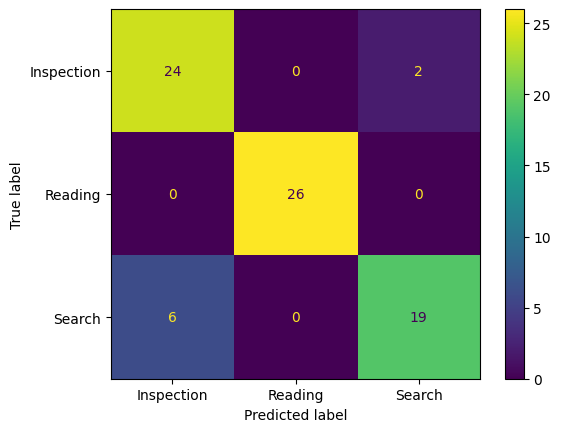

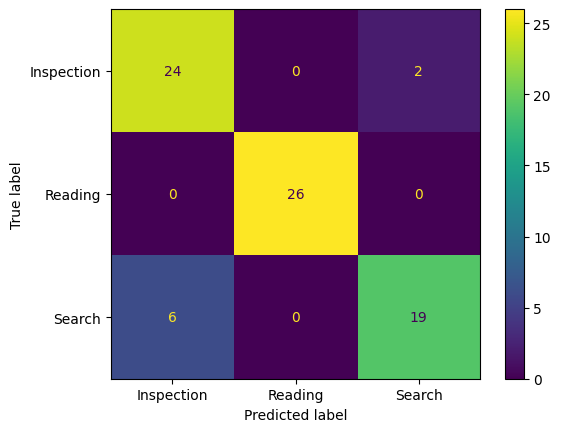

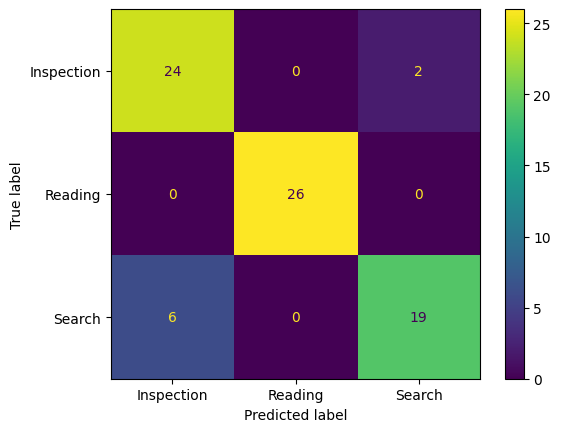

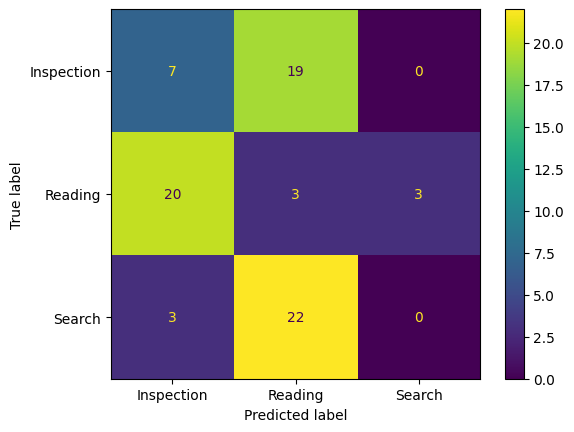

In [18]:
ConfusionMatrixDisplay.from_estimator(linear, feature_test, label_test)
ConfusionMatrixDisplay.from_estimator(poly, feature_test, label_test)
ConfusionMatrixDisplay.from_estimator(rbf, feature_test, label_test)
ConfusionMatrixDisplay.from_estimator(sig, feature_test, label_test)

## Finally, let's make a cross check

In [19]:
feature_test.head()

,meanFix,number_of_blinks,xDir,fixDensPerBB
190,0.471934,0.128205,0.504658,0.207384
298,0.496951,0.294872,0.608696,0.069528
162,0.352584,0.397436,0.625823,0.040469
188,0.337210,0.064103,0.528790,0.170942
92,0.343671,0.089744,0.683230,0.076578


In [20]:
linear.predict(np.array(features.iloc[59]).reshape(1,-1))

/Users/kaischultz/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Inspection'], dtype=object)

## Let's detect the label (i.e., the activity) of some new features (i.e., that are extracted from a new stream of eye tracking data):

In [28]:
print("New Feature:")
# NOTE that we use a particular feature from the test dataset but this can be replaced with new data e.g., that arrives online and was not included in training or testing the classifier
new_feature = feature_test.tail(2)
display(new_feature)

new_linear_pred = linear.predict_proba(new_feature)
new_linear_pred_2 = linear.predict(new_feature)
print("New Linear Prediction:")
display(new_linear_pred)
display(new_linear_pred_2)

new_poly_pred_2 = poly.predict(new_feature)
new_poly_pred = poly.predict_proba(new_feature)
print("New Poly Prediction:")
display(new_poly_pred)
display(new_poly_pred_2)

new_rbf_pred_2 = rbf.predict(new_feature)
new_rbf_pred = rbf.predict_proba(new_feature)
print("New RBF Prediction:")
display(new_rbf_pred)
display(new_rbf_pred_2)

new_sig_pred_2 = sig.predict(new_feature)
new_sig_pred = sig.predict_proba(new_feature)
print("New Sig Prediction:")
display(new_sig_pred)
display(new_sig_pred_2)

New Feature:


,meanFix,number_of_blinks,xDir,fixDensPerBB
121,0.401009,0.576923,0.905797,0.068803
195,0.515043,0.076923,0.836120,0.079461


New Linear Prediction:


array([[0.00210902, 0.96673106, 0.03115992],
       [0.02758604, 0.9578931 , 0.01452087]])

array(['Reading', 'Reading'], dtype=object)

New Poly Prediction:


array([[0.0051703 , 0.97567425, 0.01915545],
       [0.01688032, 0.97757869, 0.00554099]])

array(['Reading', 'Reading'], dtype=object)

New RBF Prediction:


array([[0.03189931, 0.90942771, 0.05867298],
       [0.02131908, 0.96380188, 0.01487904]])

array(['Reading', 'Reading'], dtype=object)

New Sig Prediction:


array([[0.15555259, 0.73880082, 0.10564659],
       [0.18611382, 0.49159105, 0.32229512]])

array(['Search', 'Inspection'], dtype=object)